In [1]:
import pandas as pd
import numpy as np
import json
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# LOADING DATASET
zomato_orgnl = pd.read_csv('zomato.csv')
# print(zomato_orgnl)
print(zomato_orgnl.shape)
zomato_orgnl.head()

(51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
zomato_orgnl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
#Deleting Unnnecessary Columns
zomato=zomato_orgnl.drop(['url','dish_liked','phone','listed_in(city)','address','online_order','book_table','votes','location','rest_type','cuisines','approx_cost(for two people)','menu_item','listed_in(type)'],axis=1) 

In [5]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   rate          43942 non-null  object
 2   reviews_list  51717 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [6]:
#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [7]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25439 entries, 0 to 51703
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          25439 non-null  object
 1   rate          25439 non-null  object
 2   reviews_list  25439 non-null  object
dtypes: object(3)
memory usage: 795.0+ KB


In [8]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25439 entries, 0 to 51703
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          25439 non-null  object
 1   rate          25439 non-null  object
 2   reviews_list  25439 non-null  object
dtypes: object(3)
memory usage: 795.0+ KB


In [9]:
#Removing '/5' from Rates
zomato['rate'].unique()
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [10]:
zomato.head()

,name,rate,reviews_list
0,Jalsa,4.1,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,4.1,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,3.8,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,3.7,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,3.8,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [11]:
df = zomato.copy()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24434 entries, 0 to 24433
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          24434 non-null  object 
 1   rate          24434 non-null  float64
 2   reviews_list  24434 non-null  object 
dtypes: float64(1), object(2)
memory usage: 572.8+ KB


In [13]:
df.count()

name            24434
rate            24434
reviews_list    24434
dtype: int64

In [14]:
df.isnull().count()

name            24434
rate            24434
reviews_list    24434
dtype: int64

In [15]:
Rate=df.rate.tolist()
#Big rating

In [16]:
for i in range(0,len(Rate)):
    Rate[i]=float(Rate[i])

In [17]:
print(np.unique(Rate))

[1.8 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]


In [18]:
df['Rate']=Rate
#rate and Rate are different

In [19]:
df.shape

(24434, 4)

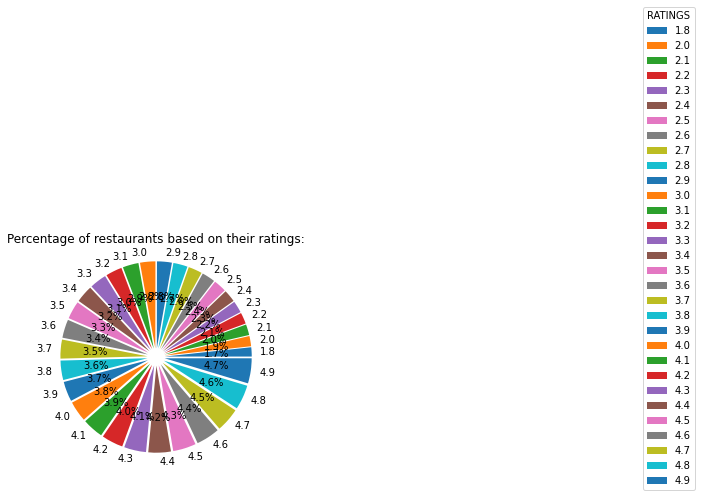

In [20]:
import matplotlib.pyplot as plt
y=np.unique(Rate)
mylabels=[1.8,2.,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9]
plt.pie(y,labels=mylabels,autopct='%1.1f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.legend(title='RATINGS',bbox_to_anchor=(3,1),loc='right')
plt.title('Percentage of restaurants based on their ratings:')
plt.show()

In [21]:
df['reviews_list'].count()

24434

In [22]:
pd.cut(df['Rate'],bins=5).value_counts(sort=False)

(1.797, 2.42]      120
(2.42, 3.04]      1839
(3.04, 3.66]      7360
(3.66, 4.28]     11568
(4.28, 4.9]       3547
Name: Rate, dtype: int64

In [23]:
labels=['worst','bad','average','good','best']
df['sentiment']=pd.cut(df['Rate'],bins=5,labels=labels)
df.head(5)

,name,rate,reviews_list,Rate,sentiment
0,Jalsa,4.1,"[('Rated 4.0', 'RATED\n A beautiful place to ...",4.1,good
1,Spice Elephant,4.1,"[('Rated 4.0', 'RATED\n Had been here for din...",4.1,good
2,San Churro Cafe,3.8,"[('Rated 3.0', ""RATED\n Ambience is not that ...",3.8,good
3,Addhuri Udupi Bhojana,3.7,"[('Rated 4.0', ""RATED\n Great food and proper...",3.7,good
4,Grand Village,3.8,"[('Rated 4.0', 'RATED\n Very good restaurant ...",3.8,good


In [24]:
#dropping extra rate column
df.drop(['rate'], axis='columns', inplace=True)

In [25]:
df.head()

,name,reviews_list,Rate,sentiment
0,Jalsa,"[('Rated 4.0', 'RATED\n A beautiful place to ...",4.1,good
1,Spice Elephant,"[('Rated 4.0', 'RATED\n Had been here for din...",4.1,good
2,San Churro Cafe,"[('Rated 3.0', ""RATED\n Ambience is not that ...",3.8,good
3,Addhuri Udupi Bhojana,"[('Rated 4.0', ""RATED\n Great food and proper...",3.7,good
4,Grand Village,"[('Rated 4.0', 'RATED\n Very good restaurant ...",3.8,good


In [26]:
my_file=df.copy() #.....Done this for saving csv file

In [27]:
#dropping reviews_list column
my_file.drop(['reviews_list'], axis='columns', inplace=True) #.....
#text lower casing
my_file['Name'] = my_file['name'].str.upper()
my_file.drop(['name'], axis='columns', inplace=True)

In [28]:
# my_file.to_csv("Final-search_edited.csv") #....
# # # already saved

In [29]:
df1=df.copy()

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24434 entries, 0 to 24433
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          24434 non-null  object  
 1   reviews_list  24434 non-null  object  
 2   Rate          24434 non-null  float64 
 3   sentiment     24434 non-null  category
dtypes: category(1), float64(1), object(2)
memory usage: 596.9+ KB


# TEXT PROCESSING AND CLEANING

In [31]:
# Retriving the text data
from tqdm import tqdm
all_ratings = []

for reviews_list in tqdm(df1['reviews_list']):
    reviews_list = eval(reviews_list)
    
    for score, doc in reviews_list:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            
            score = float(score)
            all_ratings.append([score, doc,])

100%|███████████████████████████████████████████████████████████████████████████| 24434/24434 [00:24<00:00, 990.37it/s]


In [32]:
ratings_df = pd.DataFrame(all_ratings, columns=['score', 'doc'])

print(ratings_df.shape)
ratings_df.head()
# print(all_ratings)

(1228794, 2)


,score,doc
0,4.0,A beautiful place to dine in.The interiors tak...
1,4.0,I was here for dinner with my family on a week...
2,2.0,Its a restaurant near to Banashankari BDA. Me ...
3,4.0,We went here on a weekend and one of us had th...
4,5.0,The best thing about the place is itÃÃÃÃ...


In [33]:
ratings_df['score'].unique()

array([4. , 2. , 5. , 3. , 1. , 3.5, 1.5, 4.5, 2.5])

In [34]:
# Removing ratings inside the texts
docs_with_ratings = []
for doc in ratings_df['doc'][:150]:
    if '/' in doc:
        print(doc)
        docs_with_ratings.append(doc)

Great food and pleasant ambience. Expensive but Coll place to chill and relax......

Service is really very very good and friendly staff...

Food : 5/5
Service : 5/5
Ambience :5/5
Overall :5/5
I was looking for a quite place to spend some time with family and as well wanted to try some new place. Since I was at Banashankari I thought of trying this place. The place had good rating and was part of Zomato gold. So I decided to try this place. It was a delite to see a very friendly staff and food we ordered was very tasty as well.

Food : 4/5
Ambience :3/5
Friendly staff : 4/5
Pocket friendly : 4/5

Will definitely visit again ??
Food: 8/10
Ambience:8/10
Staff:8/10
One of the good places to try north Indian food...but depends on ur taste buds. Not everyone will like all the items here. Specially when u r particular abt sweet and spicy food.
There's buffet available too.
We had ordered paneer uttar dakshin and paneer kurchan..was amazing. The Gobi hara pyaz and mix veg were average.
One of

In [35]:
print(len(docs_with_ratings))

26


In [36]:
#We will use Regex to find and replace all the occurences of ratings.
for docs in docs_with_ratings:
    x = re.findall('[0-9.]*[0-9]/[0-9]*[0-9]', docs)
    print(x)

['5/5', '5/5', '5/5', '5/5']
['4/5', '3/5', '4/5', '4/5']
['8/10', '8/10', '8/10']
['6/10', '7/10', '8/10', '7.5/10']
[]
[]
[]
[]
['4/5', '3.5/5', '4/5', '4/5']
['3/5', '3/5', '3/5']
['10/10', '10/10', '10/10', '25/10']
['4/5', '10/5']
['4/5', '4/5', '4/5']
['4/5', '10/5']
['4/5', '4/5', '4/5']
['4/5', '10/5']
['4/5', '4/5', '4/5']
['4/5', '10/5']
['4/5', '4/5', '4/5']
['4/5', '10/5']
['4/5', '4/5', '4/5']
['4/5', '10/5']
['4/5', '4/5', '4/5']
['4.5/5', '4/5', '4.5/5', '4.5/5']
['3.5/5', '4/5', '3.5/5']
['3.5/5', '4/5', '3.5/5']


In [37]:
#substituting 'score' in place of ratings in the texts
doc = docs_with_ratings[0]
subbed_doc = re.sub('[0-9.]*[0-9]/[0-9]*[0-9]', 'score', doc)
print("ORIGINAL:")
print(doc)
print("\nSUBBED:")
print(subbed_doc)

ORIGINAL:
Great food and pleasant ambience. Expensive but Coll place to chill and relax......

Service is really very very good and friendly staff...

Food : 5/5
Service : 5/5
Ambience :5/5
Overall :5/5

SUBBED:
Great food and pleasant ambience. Expensive but Coll place to chill and relax......

Service is really very very good and friendly staff...

Food : score
Service : score
Ambience :score
Overall :score


In [38]:
#text preprocessing 
ratings_df.head()

,score,doc
0,4.0,A beautiful place to dine in.The interiors tak...
1,4.0,I was here for dinner with my family on a week...
2,2.0,Its a restaurant near to Banashankari BDA. Me ...
3,4.0,We went here on a weekend and one of us had th...
4,5.0,The best thing about the place is itÃÃÃÃ...


In [39]:
#text lower casing
ratings_df['review'] = ratings_df['doc'].str.lower()

In [40]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228794 entries, 0 to 1228793
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   score   1228794 non-null  float64
 1   doc     1228794 non-null  object 
 2   review  1228794 non-null  object 
dtypes: float64(1), object(2)
memory usage: 28.1+ MB


In [41]:
#removing punctuations
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
# Apply to the DF series
ratings_df['review'] = ratings_df['review'].apply(remove_punctuations)

In [42]:
ratings_df=ratings_df.drop(['doc'],axis=1)

In [43]:
ratings_df.head()

,score,review
0,4.0,a beautiful place to dine inthe interiors take...
1,4.0,i was here for dinner with my family on a week...
2,2.0,its a restaurant near to banashankari bda me a...
3,4.0,we went here on a weekend and one of us had th...
4,5.0,the best thing about the place is itãããã...


In [44]:
## Removal of Stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

ratings_df['review'] = ratings_df['review'].apply(lambda text: remove_stopwords(text))
ratings_df.sample()

,score,review
1129140,5.0,amazing totally impressed place give place ful...


In [45]:
## Removal of urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

ratings_df['review'] = ratings_df['review'].apply(lambda text: remove_urls(text))
ratings_df.sample(3)

,score,review
654575,3.0,asked spicy chicken roll received normal roll
543439,5.0,one best chefs town run cozy place food n wine...
1118326,3.0,good


In [46]:
ratings_df.count()

score     1228794
review    1228794
dtype: int64

In [47]:
ratings_df.isnull().count()

score     1228794
review    1228794
dtype: int64

In [48]:
ratings_df.shape

(1228794, 2)

In [49]:
Score=ratings_df.score.tolist()
#new is capital Score

In [50]:
for i in range(0,len(Score)):
    Score[i]=float(Score[i])

In [51]:
print(np.unique(Score))

[1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


In [52]:
ratings_df['Score']=Score
ratings_df.shape

(1228794, 3)

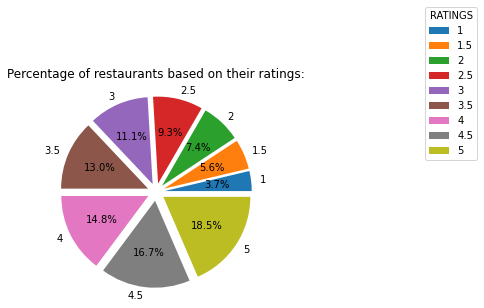

In [53]:
import matplotlib.pyplot as plt
y=np.unique(Score)
mylabels=[1,1.5,2,2.5,3,3.5,4,4.5,5]
plt.pie(y,labels=mylabels,autopct='%1.1f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.legend(title='RATINGS',bbox_to_anchor=(2,1),loc='right')
plt.title('Percentage of restaurants based on their ratings:')
plt.show()

In [54]:
 ratings_df['review'].count()

1228794

In [55]:
pd.cut(ratings_df['Score'],bins=3).value_counts(sort=False)

(0.996, 2.333]    215438
(2.333, 3.667]    237027
(3.667, 5.0]      776329
Name: Score, dtype: int64

In [56]:
labels=['Negative','Neutral','Positive']
ratings_df['sentiment']=pd.cut(ratings_df['Score'],bins=3,labels=labels)
print(ratings_df.head(5))

   score                                             review  Score sentiment
0    4.0  beautiful place dine inthe interiors take back...    4.0  Positive
1    4.0  dinner family weekday restaurant completely em...    4.0  Positive
2    2.0  restaurant near banashankari bda along office ...    2.0  Negative
3    4.0  went weekend one us buffet two us took ala car...    4.0  Positive
4    5.0  best thing place itããããããããs a...    5.0  Positive


In [57]:
#dropping extra score column
ratings_df.drop(['score'], axis='columns', inplace=True)

In [58]:
ratings_df.head()

,review,Score,sentiment
0,beautiful place dine inthe interiors take back...,4.0,Positive
1,dinner family weekday restaurant completely em...,4.0,Positive
2,restaurant near banashankari bda along office ...,2.0,Negative
3,went weekend one us buffet two us took ala car...,4.0,Positive
4,best thing place itããããããããs a...,5.0,Positive


In [59]:
ratings_df.drop(['Score'],axis=1,inplace=True)

In [60]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228794 entries, 0 to 1228793
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype   
---  ------     --------------    -----   
 0   review     1228794 non-null  object  
 1   sentiment  1228794 non-null  category
dtypes: category(1), object(1)
memory usage: 10.5+ MB


# MODEL TRAINING

In [61]:
X = ratings_df['review']
Y = ratings_df['sentiment']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)
print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("Y_train:",len(Y_train))
print("Y_test:",len(Y_test))

X_train: 921595
X_test: 307199
Y_train: 921595
Y_test: 307199


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = 'lbfgs')

In [63]:
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(X_train,Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [64]:
from sklearn.metrics import confusion_matrix
predictions=model.predict(X_test)
confusion_matrix(predictions,Y_test)

array([[ 47261,   4588,   2140],
       [  3422,  40922,   6327],
       [  2933,  13806, 185800]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print("Accuracy : ",accuracy_score(predictions,Y_test))
print("Precision : ",precision_score(predictions,Y_test,average='weighted'))
print("Recall : ",recall_score(predictions,Y_test,average='weighted'))

Accuracy :  0.8918746480294533
Precision :  0.8992838180841394
Recall :  0.8918746480294533


# PREDICTING MODEL

In [73]:
example=['worst']
result=model.predict(example)
print(result)

['Negative']
